## Objectives dari Video kali ini adalah :

1. Apa itu ***K-Means Clustering*** ?
2. Kapan saatnya ***K-Means Clustering*** tepat untuk digunakan ? 
3. Implementasi ***K-Means Clustering*** di Python

## Apa itu *K-Means Clustering* ?

K-Means Clustering adalah salah satu teknik statistik yang dapat digunakan untuk mengelompokkan data observasi menjadi beberapa kelompok atau cluster. Cluster dapat didefinisikan sebagai kummpulan objek observasi yang mirip dengan objek lain di dalam cluster yang sama, dan berbeda dengan objek yang berada di cluster lainnya.

## Kapan saat yang tepat menggunakan *K-Means Clustering* 
Tehnik K-Means Clustering dapat digunakan saat seorang analis ingin melakukan pengelompokkan atas data yang dimiliki, seperti melakukan segmentasi terhadap customer, atau melakukan customer profiling. Atau pengelompokkan terhadap siswa di sekolah, mahasiswa dan lainnya. Intinya adalah pengelompokkan objek berdasarkan karakter yang dimiliki oleh objek yang diamati.

## Implementasi *K-Means Clustering* menggunakan Python (Scikit-Learn Library)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
DF = pd.read_csv('segmentation data.csv', encoding = 'utf-8').dropna()
DF.describe()
DF

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
DF_ARRAY = np.array(DF.drop('ID',axis=1))          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

In [4]:
# Creating our Model
kmeans = KMeans(n_clusters = 3)

# Training our model
kmeans.fit(DF_NORM)

C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\

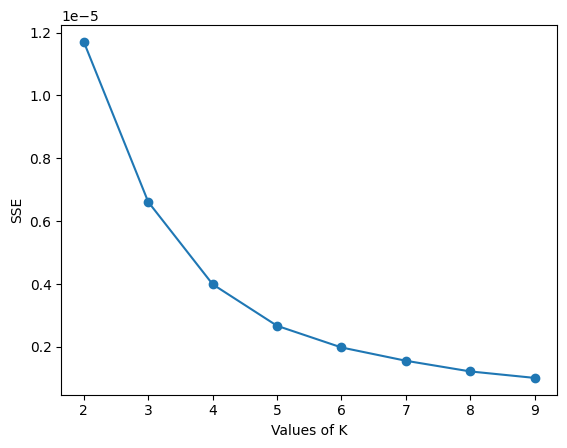

In [5]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [6]:
# Creating our Model
kmeans = KMeans(n_clusters = 3)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
DF['cluster'] = kmeans.labels_

C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
DF

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0
1996,100001997,1,1,27,1,117744,1,0,2
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,2


In [8]:
# Reducing data dimensions 
PCA_ = PCA(n_components = 2).fit(DF_ARRAY)

# Applying the PCA
PCA_2 = PCA_.transform(DF_ARRAY)

In [9]:
# # Plot size
# plt.figure(figsize=(8,6))

# # Plotting each point individually depending on their cluster
# for i in range(0, PCA_2.shape[0]):
    
#     # If the 'i' data point be in cluster 0, it will be plotted as the formatting inside the if functions
#     # And so on...
#     if kmeans.labels_[i] == 0:
#         CLUSTER_01 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='r', marker = 'o', s = 120)
        
#     elif kmeans.labels_[i] == 1:
#         CLUSTER_02 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='g', marker = 'x', s = 120)

#     elif kmeans.labels_[i] == 2:
#         CLUSTER_03 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='b', marker = '+', s = 120)


In [15]:
cluster_0 = DF.loc[DF['cluster']==0]
cluster_1 = DF.loc[DF['cluster']==1]
cluster_2 = DF.loc[DF['cluster']==2]
cluster_2

cluster_0['Age'].min()
cluster_0

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
4,100000005,0,0,53,1,149031,1,1,0
6,100000007,0,0,53,1,156495,1,1,0
8,100000009,0,1,61,2,151591,0,0,0
15,100000016,1,1,32,1,88428,0,0,0
16,100000017,0,0,53,1,125550,1,0,0
...,...,...,...,...,...,...,...,...,...
1993,100001994,1,0,38,1,87670,0,0,0
1994,100001995,0,0,45,1,113414,1,0,0
1995,100001996,1,0,47,1,123525,0,0,0
1997,100001998,0,0,31,0,86400,0,0,0


# Data Classification
<ul>
    <li>Sex : 0 => Male , 1 =>Female')</li>
    <li>Marital Status : 0 => Single , 1 => Married</li>
    <li>Education : 0 => Unknown / Other, 1 => Highschool , 2 => University , 3 => Graduate School</li>
    <li>Occupation : 0 => Unemployed / Unskilled , 1 => Skilled Employee , 2 => Management Level</li>
    <li>Settlement size : 0 => Small City , 1 => Mid-Sized City , 2 => Big City</li>
</ul>

# Cluster 0 / Masyarakat kelas mengengah

In [11]:
print(cluster_0['Sex'].value_counts())
print(cluster_0['Marital status'].value_counts())
print(cluster_0['Age'].sort_values().value_counts)
print(cluster_0['Education'].value_counts())
print(cluster_0['Income'].mean())
print(cluster_0['Occupation'].value_counts())
print(cluster_0['Settlement size'].value_counts())


Sex
0    426
1    305
Name: count, dtype: int64
Marital status
0    441
1    290
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 1961    20
1423    21
1710    21
1701    21
587     21
        ..
606     74
186     74
330     75
536     75
1064    76
Name: Age, Length: 731, dtype: int64>
Education
1    469
2    167
0     81
3     14
Name: count, dtype: int64
109656.8098495212
Occupation
0    349
1    335
2     47
Name: count, dtype: int64
Settlement size
0    436
1    167
2    128
Name: count, dtype: int64


<p>Cluster 0 merupakan cluster yang di dominasi oleh <strong>Wanita Single yang berusia diatas 20 Tahun, yang kebanyakan lulusan SMA dan Grade School, sebagian besar customer pada cluster ini hanya karyawan biasa dan juga belum memiliki pekerjaan .dan hanya sebagian kecil dari cluster ini yang pekerjaanya berada di tingkat manajerial. Rata rata pendapatan customer pada cluster ini adalah $109,656 per tahun . Customer yang ada di cluster ini kebanyakan tinggal di kota kecil</strong></p>

# Cluster 1 / Masyarakat kelas rendah

In [12]:
print(cluster_1['Sex'].value_counts())
print(cluster_1['Marital status'].value_counts())
print(cluster_1['Age'].sort_values().value_counts)
print(cluster_1['Education'].value_counts())
print(cluster_1['Income'].mean())
print(cluster_1['Occupation'].value_counts())
print(cluster_1['Settlement size'].value_counts())


Sex
0    83
1    78
Name: count, dtype: int64
Marital status
0    99
1    62
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 1965    24
364     25
1714    25
439     26
640     27
        ..
187     68
1432    70
1397    71
756     74
430     74
Name: Age, Length: 161, dtype: int64>
Education
1    83
2    64
3    11
0     3
Name: count, dtype: int64
84845.00621118012
Occupation
0    140
1     21
Name: count, dtype: int64
Settlement size
0    142
2     13
1      6
Name: count, dtype: int64


<p>Cluster 1 merupakan cluster yang berjumlah paling sedikit yaitu hanya berisi 161 customer. cluster ini berisi <strong>kumpulan pria dan wanita yang sudah menikah maupun tidak yang kebanyakan hanya tamatan sma dan tidak ada yang pekerjaanya di level manajemen.Rata rata pemasukan customer pada cluster ini merupakan yang terkecil, yaitu hanya $84,845 per tahun. Kebanyakan customer pada cluster ini belum memiliki pekerjaan dan tinggal di kota kota kecil. range usia customer pada cluster ini adalah 25 - 74 tahun.</strong></p>

# Cluster 2

In [13]:
print(cluster_2['Sex'].value_counts())
print(cluster_2['Marital status'].value_counts())
print(cluster_2['Age'].sort_values().value_counts)
print(cluster_2['Education'].value_counts())
print(cluster_2['Income'].mean())
print(cluster_2['Occupation'].value_counts())
print(cluster_2['Settlement size'].value_counts())


Sex
0    577
1    531
Name: count, dtype: int64
Marital status
1    641
0    467
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 1819    18
1160    18
1421    18
1307    19
391     19
        ..
1037    63
373     63
1093    65
1029    68
917     68
Name: Age, Length: 1108, dtype: int64>
Education
1    834
0    203
2     60
3     11
Name: count, dtype: int64
133654.93140794223
Occupation
1    757
2    207
0    144
Name: count, dtype: int64
Settlement size
0    411
1    371
2    326
Name: count, dtype: int64


<p>Cluster ke 2 ini berisi <strong> data pria dan wanita yang sudah menikah maupun tidak dari usia 18 - 68 tahun. Customer pada cluster ini kebanyakan sudah lulus SMA. Sebagian besar customer dari cluster ini sudah bekerja sebagai karyawan dan sebagian kecil di level manajemen. Customer dari cluster ini memiliki penghasilan rata rata paling tinggi yaitu $133,654 per tahun </strong></p>